# Solution: Population effects of vaccination

<img src="../GraphicsAndData/w5_nb5_diagram.png"> 

**Model without vaccination:**

[1] "Peak prevalence"


[1] 11532.76

[1] "Number of deaths by the end of the epidemic"


[1] 6205.475

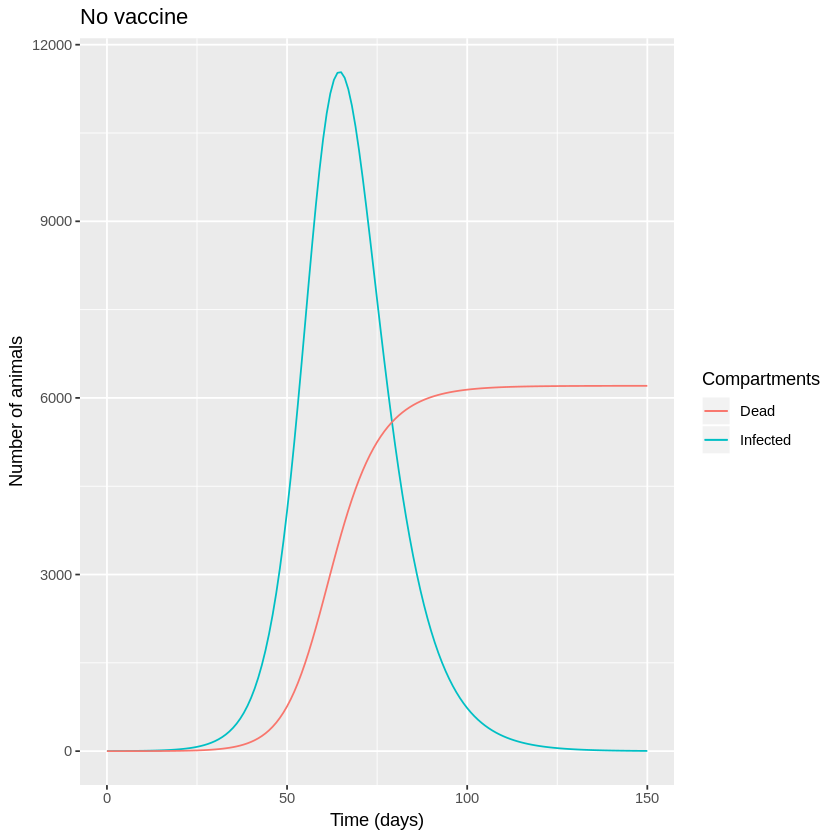

In [1]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

# Specify the total population size
N <- 100000

# Specify the vaccination coverage
p <- 0                        

# Initial number of animals in each compartment
initial_state_values <- c(S = 0.9*N, # Susceptible general population: 90% of the population is not high-risk
                          I = 1,     # Infected general population: the epidemic starts with 1 case
                          R = 0,     # Recovered general population     
                          U = (1-p)*0.1*N, # Unvaccinated high-risk susceptible: 10% of the population is high risk, of which (1-p) are unvaccinated
                          Iu = 0,  # Unvaccinated high-risk infected
                          Ru = 0,  # Unvaccinated high-risk recovered
                          V = p*0.1*N, # Vaccinated high-risk susceptible: 10% of the population is high risk, of which a proportion p are vaccinated
                          Iv = 0,  # Vaccinated high-risk infected
                          Rv = 0,  # Vaccinated high-risk recovered
                          M = 0)   # Dead         

# Parameters
parameters <- c(beta = 0.4,      # the infection rate in units of days^-1
                gamma = 0.2,     # the recovery rate in units of days^-1
                mu = 1)          # the mortality rate in units of days^-1

# TIMESTEPS:

# Sequence of timesteps to solve the model at
times <- seq(from = 0, to = 150, by = 1)   # from 0 to 150 days in daily intervals

# MODEL FUNCTION: 

vaccine_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {    
        
    # Defining lambda:
      lambda <- beta * (I+Iu+Iv)/N    # all infected strata contribute equally to transmission at a rate beta
        
    # The differential equations
      dS <- -lambda * S             
      dI <- lambda * S - gamma * I   
      dR <- gamma * I
      dU <- -lambda * U
      dIu <- lambda * U - gamma * Iu - mu * Iu
      dRu <- gamma * Iu
      dM <- mu * Iu
      dV <- -lambda * V
      dIv <- lambda * V - gamma * Iv
      dRv <- gamma * Iv
        
    # All susceptible strata become infected at the same rate lambda
      
    # Return the number of animals in each compartment at each timestep 
    # (in the same order as the input state variables)
    return(list(c(dS, dI, dR, dU, dIu, dRu, dV, dIv, dRv, dM))) 
    })
  
}

# MODEL OUTPUT:

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = vaccine_model,
                            parms = parameters))

# PLOT THE OUTPUT

ggplot(data = output,                                               
       aes(x = time)) + 
  geom_line(aes(y = I+Iu+Iv, colour = "Infected")) +    # prevalence of infection = sum of I, Iu and Iv compartments          
  geom_line(aes(y = M, colour = "Dead")) +        
  xlab("Time (days)")+                                                   
  ylab("Number of animals") +                                      
  labs(colour = "Compartments", title = "No vaccine")

# Calculating peak prevalence and the number of deaths
print("Peak prevalence")
max(output$I+output$Iv+output$Iu)  # the peak prevalence is the maximum over all timepoints

print("Number of deaths by the end of the epidemic")
max(output$M)    
# no one moves out of the M (dead) compartment so the number of animals here represent the cumulative incidence 
# of death 

### In the absence of vaccination, what is the total prevalence of infection at the peak of the epidemic? How many animals have died by the end of the epidemic?

The total prevalence of infection (including infection in the general population and among vaccinated and unvaccinated high-risk group animals) at the peak of the epidemic is around 11500. By the end of the epidemic, over 6200 animals have died from severe disease.

**With vaccination of 100% of high-risk animals:**

[1] "Peak prevalence"


[1] 15342.24

[1] "Number of deaths by the end of the epidemic"


[1] 0

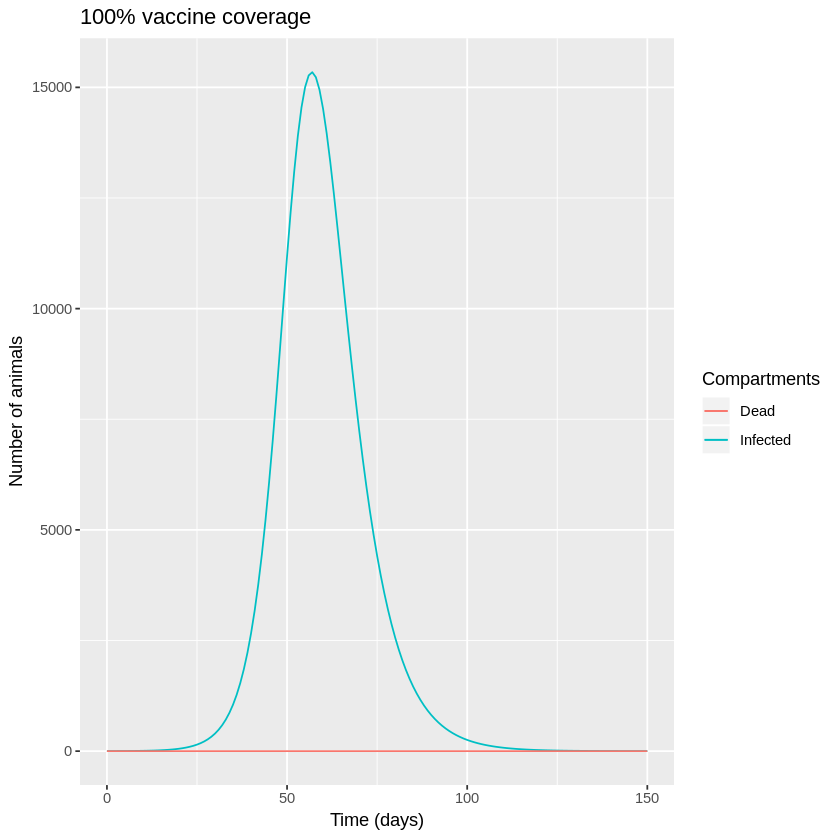

In [2]:
# Specify the vaccination coverage
p <- 1                       

# Initial number of animals in each compartment
initial_state_values <- c(S = 0.9*N, # Susceptible general population: 90% of the population is not high-risk
                          I = 1,     # Infected general population: the epidemic starts with 1 case
                          R = 0,     # Recovered general population     
                          U = (1-p)*0.1*N, # Unvaccinated high-risk susceptible: 10% of the population is high risk, of which (1-p) are unvaccinated
                          Iu = 0,  # Unvaccinated high-risk infected
                          Ru = 0,  # Unvaccinated high-risk recovered
                          V = p*0.1*N, # Vaccinated high-risk susceptible: 10% of the population is high risk, of which a proportion p are vaccinated
                          Iv = 0,  # Vaccinated high-risk infected
                          Rv = 0,  # Vaccinated high-risk recovered
                          M = 0)   # Dead         

# MODEL OUTPUT:

# Solving the differential equations using the ode integration algorithm
output_vacc <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = vaccine_model,
                            parms = parameters))

# PLOT THE OUTPUT

ggplot(data = output_vacc,                                               
       aes(x = time)) + 
  geom_line(aes(y = I+Iu+Iv, colour = "Infected")) +    # prevalence of infection = sum of I, Iu and Iv compartments          
  geom_line(aes(y = M, colour = "Dead")) +        
  xlab("Time (days)")+                                                   
  ylab("Number of animals") +                                      
  labs(colour = "Compartments", title = "100% vaccine coverage")

# Calculating peak prevalence and the number of deaths
print("Peak prevalence")
max(output_vacc$I+output_vacc$Iv+output_vacc$Iu)  # the peak prevalence is the maximum over all timepoints

print("Number of deaths by the end of the epidemic")
max(output_vacc$M)    
# no one moves out of the M (dead) compartment so the number of people here represent the cumulative incidence 
# of death 

### How does the vaccine affect the peak prevalence of infection and the total number of deaths? Can you explain this finding?

If all high-risk animals are vaccinated at the start of the epidemic, there are no deaths from the disease. However, the peak prevalence of infection is now 15342 animals - 33% more animals are being infected than if none were vaccinated!

The reason for this is simple - by preventing the death of animals in the high-risk group, the vaccine is actually allowing more opportunities for transmission from them, since they are alive for longer, and the vaccine has no
effect on susceptibility to infection.

### Based on your answer to the previous question, what do you think is the effect of the vaccine if 30% of the population are at risk of severe disease, instead of 10%? Use your model to confirm this below.

Since more animals at high-risk would be prevented from dying, we would expect the vaccine to increase the peak prevalence of infection even more in comparison to the prevalence without vaccination. Let's confirm this with the model, by simulating both scenarios with the high-risk population prevalence set at 30%:

In [3]:
## First, simulate the new initial conditions without vaccine

# Specify the vaccination coverage
p <- 0                        

# Initial number of animals in each compartment
initial_state_values <- c(S = 0.7*N, # Susceptible general population: 70% of the population is not high-risk
                          I = 1,     # Infected general population: the epidemic starts with 1 case
                          R = 0,     # Recovered general population     
                          U = (1-p)*0.3*N, # Unvaccinated high-risk susceptible: 30% of the population is high risk, of which (1-p) are unvaccinated
                          Iu = 0,  # Unvaccinated high-risk infected
                          Ru = 0,  # Unvaccinated high-risk recovered
                          V = p*0.3*N, # Vaccinated high-risk susceptible: 30% of the population is high risk, of which a proportion p are vaccinated
                          Iv = 0,  # Vaccinated high-risk infected
                          Rv = 0,  # Vaccinated high-risk recovered
                          M = 0)   # Dead         

# Solving the differential equations using the ode integration algorithm
output2_novacc <- as.data.frame(ode(y = initial_state_values, 
                                        times = times, 
                                        func = vaccine_model,
                                        parms = parameters))

# Calculating peak prevalence and the number of deaths
print("Peak prevalence - no vaccine")
max(output2_novacc$I+output2_novacc$Iv+output2_novacc$Iu)

print("Number of deaths by the end of the epidemic - no vaccine")
max(output2_novacc$M)    

## Then, simulate with 100% vaccine coverage

# Specify the vaccination coverage
p <- 1                       

# Initial number of animals in each compartment
initial_state_values <- c(S = 0.7*N, # Susceptible general population: 90% of the population is not high-risk
                          I = 1,     # Infected general population: the epidemic starts with 1 case
                          R = 0,     # Recovered general population     
                          U = (1-p)*0.3*N, # Unvaccinated high-risk susceptible: 10% of the population is high risk, of which (1-p) are unvaccinated
                          Iu = 0,  # Unvaccinated high-risk infected
                          Ru = 0,  # Unvaccinated high-risk recovered
                          V = p*0.3*N, # Vaccinated high-risk susceptible: 10% of the population is high risk, of which a proportion p are vaccinated
                          Iv = 0,  # Vaccinated high-risk infected
                          Rv = 0,  # Vaccinated high-risk recovered
                          M = 0)   # Dead         

# Solving the differential equations using the ode integration algorithm
output2_vacc <- as.data.frame(ode(y = initial_state_values, 
                                        times = times, 
                                        func = vaccine_model,
                                        parms = parameters))

# Calculating peak prevalence and the number of deaths
print("Peak prevalence - with vaccine")
max(output2_vacc$I+output2_vacc$Iv+output2_vacc$Iu)

print("Number of deaths by the end of the epidemic - with vaccine")
max(output2_vacc$M)  

## Calculate the percentage increase in prevalence with vaccination (compared to no vaccination)
print("Percentage increase in peak prevalence with vaccination")
(max(output2_vacc$I+output2_vacc$Iv+output2_vacc$Iu)-max(output2_novacc$I+output2_novacc$Iv+output2_novacc$Iu))*100/
  max(output2_novacc$I+output2_novacc$Iv+output2_novacc$Iu)

[1] "Peak prevalence - no vaccine"


[1] 5010.615

[1] "Number of deaths by the end of the epidemic - no vaccine"


[1] 14463.29

[1] "Peak prevalence - with vaccine"


[1] 15342.24

[1] "Number of deaths by the end of the epidemic - with vaccine"


[1] 0

[1] "Percentage increase in peak prevalence with vaccination"


[1] 206.1948

Indeed, the peak prevalence of infection is over twice as high when vaccinating all high-risk animals compared to not vaccinating anyone. However, the vaccine has also prevented all deaths from the disease - a total of 14463 deaths. Saving these animals is clearly a desirable outcome, but it comes at the cost of more animals becoming infected overall. Remember that this is only a theoretical example, as many vaccines also act to reduce susceptibility and onward infectiousness. However, this example illustrates how modelling can provide useful (and sometimes unexpected) insights.